In [1]:

from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, TruncatedSVD
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import os

current_dir = os.getcwd()
%cd ..
import textmining.text_miner 
import textmining.topic_modeler as tm

importlib.reload(textmining.text_miner)
importlib.reload(textmining.topic_modeler)
os.chdir(current_dir)


import seaborn as sns
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt



C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# NMF based topic modelling - with tfidf

In [2]:
data = pd.read_json('../data/articles_with_adu_liwc_lexicons_content.json', orient='records')
data.set_index('idx', inplace=True)

stop_words_extension = ['editor', 'editorial', 'mr']

nmf_modeler = tm.topic_modeler(data['content'].values.tolist(),
                               stopwords_extension= stop_words_extension)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Plotting cohenrence for each K topics

In [3]:
start= 2#125## 85 # 45
step=1
limit=30 # not included

removing stop words...
end removing stop words.
calling lemmatizing:
lemmatization...
end of lemmatization.
Initializing the corpus after lemmatization
training on TFIDF
2 :    -    coherence: 0.309366085765575
3 :    -    coherence: 0.31315476011575644
4 :    -    coherence: 0.26661307740378964
5 :    -    coherence: 0.35296124623264646
6 :    -    coherence: 0.35883160061941494
7 :    -    coherence: 0.3373791637948958
8 :    -    coherence: 0.3807759155781156
9 :    -    coherence: 0.3714467625439396
10 :    -    coherence: 0.3662584313964544
11 :    -    coherence: 0.3677055071519746
12 :    -    coherence: 0.39901433780415924
13 :    -    coherence: 0.37350562580097757
14 :    -    coherence: 0.3957404213900261
15 :    -    coherence: 0.3730880052939354
16 :    -    coherence: 0.38362110457603027
17 :    -    coherence: 0.3977608955415438
18 :    -    coherence: 0.377956057929076
19 :    -    coherence: 0.39798759906237696
20 :    -    coherence: 0.4110330325735941
21 :    -    co

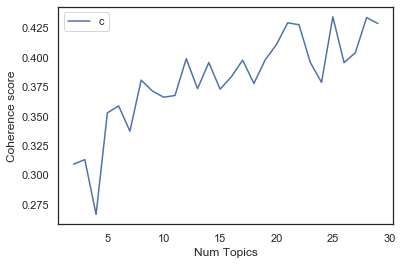

In [4]:
nmf_model_list, coherence_vals = nmf_modeler.compute_coherence_values(limit, start=start, step=step,
                                                                                      model_type='nmf',
                                                                                     corpus_type ='tfidf')



In [5]:
## Saving results 
n = nmf_modeler.num_topics
print('best model has {} topics'.format(n))

coherence_vals_df =  pd.DataFrame({'Number of Topics':range(start, limit, step), 'Coherence Value':coherence_vals} )
coherence_vals_df.to_csv('../out/feature_extraction/nmf/nmf_coherence_values_{}_{}.csv'.format(start, (limit-1)))

best model has 25 topics


In [6]:
def save_model_info(modeler):
    n = modeler.num_topics
    print('get_doc_dominant_topic')
    nmf_readable_document_topics_df =  modeler.get_doc_dominant_topic(save_path= "../out/feature_extraction/nmf/nmf_readable_document_topics_{}.csv".format(n))
    
    print('get_topics_terms')
    nmf_topic_words_df = modeler.get_topics_terms(save_path= "../out/feature_extraction/nmf/nmf_topic_words_{}.csv".format(n))
    
    print('get_doc_topic_matrix')
    nmf_document_topics_df = modeler.get_doc_topic_matrix(save_path= "../out/feature_extraction/nmf/nmf_document_topics_{}.csv".format(n))
    
    return nmf_readable_document_topics_df, nmf_topic_words_df, nmf_document_topics_df

In [7]:
nmf_readable_document_topics_df, nmf_topic_words_df, nmf_document_topics_df = save_model_info(nmf_modeler)

get_doc_dominant_topic
get_topics_terms
get_doc_topic_matrix


### Ploting Topics Distributions

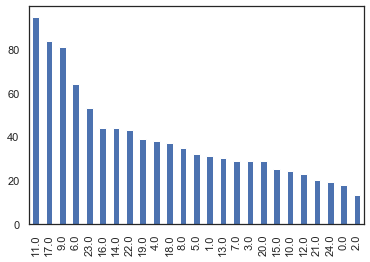

In [8]:
topic_dstr = nmf_modeler.get_topic_distr()
topic_dstr['Dominant_Topic'].value_counts().plot(kind='bar')


In [9]:
topic_dstr['Topic_Keywords'].fillna('No Topic', inplace=True)

In [10]:
topic_dstr.to_csv('../out/feature_extraction/nmf/nmf_topics_distribution_{}.csv'.format(n))

#### Docs dominant Topics

In [11]:
#doc_dominant_topic_df.reset_index().to_csv('../../data/feature_extraction/nmf_document_topics_25.csv')
nmf_readable_document_topics_df.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0.0,0.2097,"tax, campaign, broadwater, financing, alternat...",''The familiar and the fancy are combined to s...
1,9.0,0.3190,"budget, governor, state, reform, medicaid, pat...","A $141,000 salary seems generous, but for judg..."
2,2.0,0.2338,"cuomo, stadium, hevesi, jet, taliban, afghanis...",A State Supreme Court judge yesterday removed ...
3,16.0,0.2460,"iraq, police, fire, iran, military, war, offic...",A battle between Yonkers and its neighbors ove...
4,5.0,0.2834,"pension, bottle, dinapoli, bill, bank, deficit...",A bill headed for a vote in the Senate would u...
5,7.0,0.3396,"plant, chemical, town, tax, clean_air, industr...",A bill is moving forward in Congress that woul...
6,11.0,0.3517,"tax, iran, china, bush, united, program, congr...","A bipartisan, Congressionally mandated task fo..."
7,4.0,0.3737,"bush, college, oil, aids, fund, prisoner, pres...",A commission investigating the United Nations'...
8,8.0,0.3335,"library, amnesty, bloomberg, mayor, city, part...",A court battle over the right to demonstrate o...
9,6.0,0.2496,"school, albany, reform, spitzer, campaign, chi...",A famous hunter and outdoorsman recently voice...


#### Wordclouds for each topic

In [12]:
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


topics = nmf_modeler.model.show_topics(num_topics=35, num_words=10, formatted=False)



def show_word_cloud(topics, limit=10, stopwords_extension=[], topic_index=range(1, 11)):
    # 1. Wordcloud of Top N words in each topic

    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    stop_words = stopwords.words('english')
    stop_words.extend(stopwords_extension)

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    fig, axes = plt.subplots(int(limit / 2), 2, figsize=(10, 10), sharex='all', sharey='all')

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_index[i]), fontdict=dict(size=16))
        plt.gca().axis('off')
        if i > limit:
            break

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

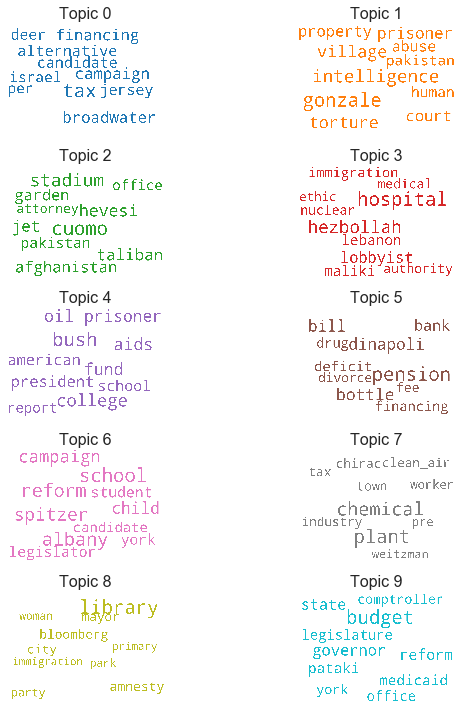

In [13]:

show_word_cloud(topics[:10],  limit=10, stopwords_extension=stop_words_extension, topic_index=range(0,10))

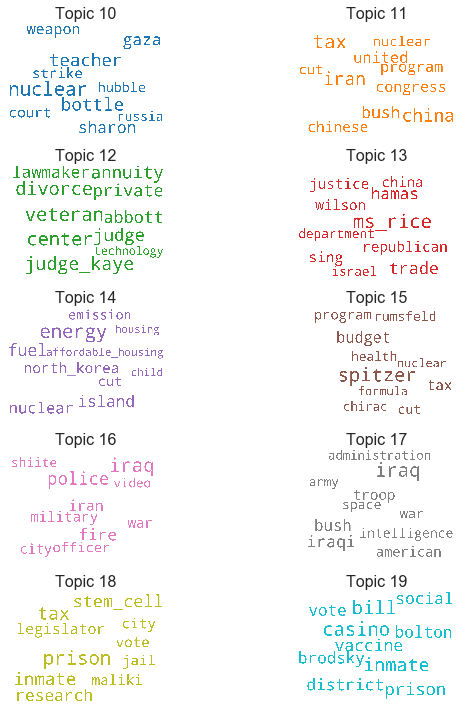

In [14]:
show_word_cloud(topics[10:20],  limit=10, stopwords_extension=stop_words_extension, topic_index=range(10,20))

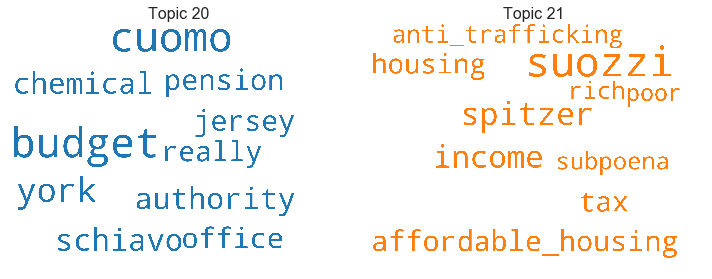

In [15]:
show_word_cloud(topics[20:23],  limit=3, stopwords_extension=stop_words_extension, topic_index=range(20,23))

IndexError: list index out of range

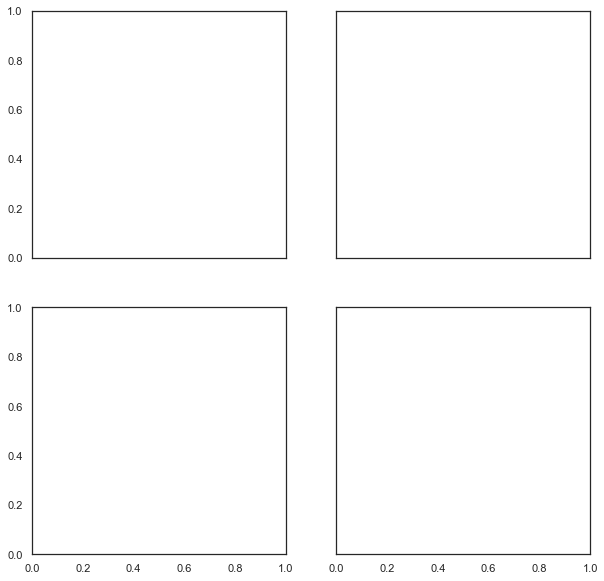

In [16]:
show_word_cloud(topics[30:35],  limit=5, stopwords_extension=stop_words_extension, topic_index=range(30,35))